In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
def calcular_media_cor(imagem_path):
    if not os.path.isfile(imagem_path):
        print(f"Erro: Não foi possível carregar a imagem em '{imagem_path}'.")
        return None
    
    imagem = cv2.imread(imagem_path)
    if imagem is None:
        print(f"Erro: Não foi possível carregar a imagem em '{imagem_path}'.")
        return None
    
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    media_cor = np.mean(imagem.reshape(-1, 3), axis=0)
    return media_cor

padrões_banana = [
    calcular_media_cor('patterns/img1.jpg'),
    calcular_media_cor('patterns/img2.jpg'),
    calcular_media_cor('patterns/img3.jpg'),
    calcular_media_cor('patterns/img4.jpg'),
    calcular_media_cor('patterns/img5.jpg'),
]

def cores_semparelhadas(cor1, cor2, tolerancia=20):
    distancia = np.linalg.norm(cor1 - cor2)
    return distancia < tolerancia

def detectar_manchas_escuras(imagem_rgb, limiar=125):
    # Detecta pixels que são escuros (R, G, B todos abaixo do limiar)
    mask = (imagem_rgb[:, :, 0] < limiar) & (imagem_rgb[:, :, 1] < limiar) & (imagem_rgb[:, :, 2] < limiar)
    return mask


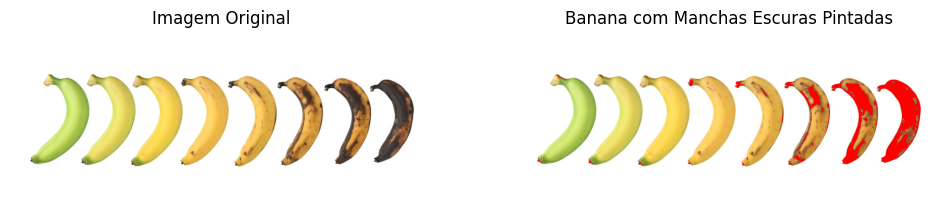

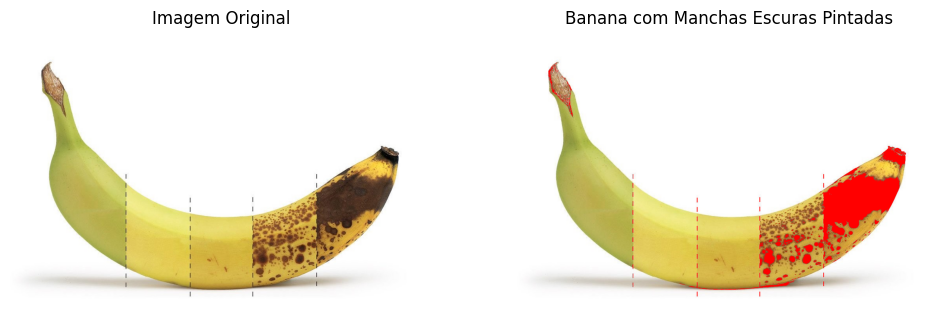

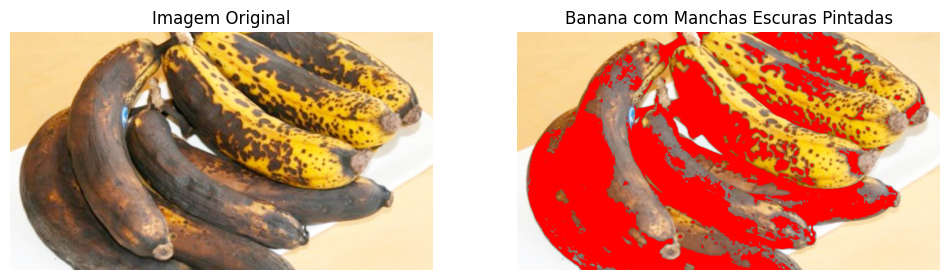

In [9]:
def colorir_banana(imagem_path):
    if not os.path.isfile(imagem_path):
        print(f"Erro: O arquivo não existe em '{imagem_path}'.")
        return
    
    imagem = cv2.imread(imagem_path)
    if imagem is None:
        print(f"Erro: Não foi possível carregar a imagem em '{imagem_path}'. Verifique o caminho e a integridade do arquivo.")
        return
    
    imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    imagem_colorida = imagem_rgb.copy()


    mask = detectar_manchas_escuras(imagem_rgb)


    imagem_colorida[mask] = [255, 0, 0]  # Vermelho

    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(imagem_rgb)
    plt.title("Imagem Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(imagem_colorida)
    plt.title("Banana com Manchas Escuras Pintadas")
    plt.axis("off")

    plt.show()

colorir_banana('image/banana_1.jpg')
colorir_banana('image/banana_2.jpg')
colorir_banana('image/banana_3.jpg')